In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
lats = np.random.uniform(low = -90, high = 90, size = 1500)
lngs = np.random.uniform(low = -90, high = 90, size = 1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [3]:
coordinates = list(lats_lngs)

In [4]:
from citipy import citipy
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)


In [5]:
import requests 
from config import weather_api_key

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)
len(cities)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e80ced135b4bf95e3abb6c76e8907565


604

In [7]:
# city_url = url + "&q=" + "Boston"
# print(city_url)

In [8]:
# city_weather = requests.get(city_url)

# if city_weather.status_code == 200:
#     print('City found')
# else:
#     print('Not found')

# city_weather_json = city_weather.json()

In [9]:
# city_weather_json.get('main')

In [10]:
# boston_data = city_weather_json
# boston_data['sys']

In [11]:
# boston_data['sys']['country']

In [12]:
# lat = boston_data['coord']['lat']
# lng = boston_data['coord']['lon']
# max_temp = boston_data['main']['temp_max']
# humidity= boston_data['main']['humidity']
# clouds = boston_data['clouds']['all']
# wind = boston_data['wind']['speed']
# print(lat, lng, max_temp, humidity, clouds, wind)

In [13]:
from datetime import datetime

# date = boston_data['dt']

# # Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
# datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

In [14]:
city_data = []
print('Beginning Data Retrieval    ')
print('----------------------------')

#create counters
record_count = 1
set_count = 1

#Group cities in 50 for logging
for i, city in enumerate(cities):
    if(i%50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
   # create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    #Log url
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    
    record_count += 1

    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        #convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

   # If an error is experienced, skip the city.
    except Exception as e: 
        print(e)
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | sao domingos
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | kuminskiy
Processing Record 5 of Set 1 | sinnamary
Processing Record 6 of Set 1 | souillac
Processing Record 7 of Set 1 | conceicao da barra
Processing Record 8 of Set 1 | mocuba
Processing Record 9 of Set 1 | qeshm
Processing Record 10 of Set 1 | beisfjord
Processing Record 11 of Set 1 | eyl
Processing Record 12 of Set 1 | hennebont
Processing Record 13 of Set 1 | seredeyskiy
Processing Record 14 of Set 1 | coquimbo
Processing Record 15 of Set 1 | saint george
Processing Record 16 of Set 1 | kapustin yar
Processing Record 17 of Set 1 | tenenkou
Processing Record 18 of Set 1 | taolanaro
'coord'
City not found. Skipping...
Processing Record 19 of Set 1 | halifax
Processing Record 20 of Set 1 | barentsburg
'coord'
City not found. Skipping...
Processing Record 21 of Set 1 | cape 

Processing Record 32 of Set 4 | dudinka
Processing Record 33 of Set 4 | clyde river
Processing Record 34 of Set 4 | virginia beach
Processing Record 35 of Set 4 | maragogi
Processing Record 36 of Set 4 | bajah
Processing Record 37 of Set 4 | saldanha
Processing Record 38 of Set 4 | calvinia
Processing Record 39 of Set 4 | san vicente
Processing Record 40 of Set 4 | les cayes
Processing Record 41 of Set 4 | buraydah
Processing Record 42 of Set 4 | marrakesh
Processing Record 43 of Set 4 | coihaique
Processing Record 44 of Set 4 | bukama
Processing Record 45 of Set 4 | ferme-neuve
Processing Record 46 of Set 4 | cidreira
Processing Record 47 of Set 4 | bonavista
Processing Record 48 of Set 4 | jamame
Processing Record 49 of Set 4 | bereda
Processing Record 50 of Set 4 | buritizeiro
Processing Record 1 of Set 5 | jacareacanga
Processing Record 2 of Set 5 | viedma
Processing Record 3 of Set 5 | rorvik
Processing Record 4 of Set 5 | oparino
Processing Record 5 of Set 5 | paamiut
Processing 

Processing Record 21 of Set 8 | surt
Processing Record 22 of Set 8 | san-pedro
Processing Record 23 of Set 8 | antofagasta
Processing Record 24 of Set 8 | slonim
Processing Record 25 of Set 8 | visimo-utkinsk
'coord'
City not found. Skipping...
Processing Record 26 of Set 8 | zaraza
Processing Record 27 of Set 8 | kapiri mposhi
Processing Record 28 of Set 8 | cap malheureux
Processing Record 29 of Set 8 | port blair
Processing Record 30 of Set 8 | gioia tauro
Processing Record 31 of Set 8 | salisbury
Processing Record 32 of Set 8 | lubango
Processing Record 33 of Set 8 | wabrzezno
Processing Record 34 of Set 8 | thunder bay
Processing Record 35 of Set 8 | rimavska sobota
Processing Record 36 of Set 8 | antigonish
Processing Record 37 of Set 8 | gomel
Processing Record 38 of Set 8 | of
'coord'
City not found. Skipping...
Processing Record 39 of Set 8 | mana
Processing Record 40 of Set 8 | kambove
Processing Record 41 of Set 8 | san diego de los banos
Processing Record 42 of Set 8 | inta

Processing Record 8 of Set 12 | el tarra
Processing Record 9 of Set 12 | marzuq
Processing Record 10 of Set 12 | obo
Processing Record 11 of Set 12 | adrar
Processing Record 12 of Set 12 | iskateley
Processing Record 13 of Set 12 | damaturu
Processing Record 14 of Set 12 | penzance
Processing Record 15 of Set 12 | coruripe
Processing Record 16 of Set 12 | paratebueno
Processing Record 17 of Set 12 | venice
Processing Record 18 of Set 12 | sembe
Processing Record 19 of Set 12 | bozoum
Processing Record 20 of Set 12 | cururupu
Processing Record 21 of Set 12 | alpena
Processing Record 22 of Set 12 | yar-sale
Processing Record 23 of Set 12 | plettenberg bay
Processing Record 24 of Set 12 | conde
Processing Record 25 of Set 12 | morros
Processing Record 26 of Set 12 | iquitos
Processing Record 27 of Set 12 | nola
Processing Record 28 of Set 12 | longonjo
Processing Record 29 of Set 12 | mittersill
Processing Record 30 of Set 12 | cabedelo
Processing Record 31 of Set 12 | norrkoping
Processi

In [15]:
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,46.99,94,0,9.17,AU,2020-11-27 16:55:17
1,Sao Domingos,-13.40,-46.32,83.62,50,86,7.70,BR,2020-11-27 16:55:17
2,Ushuaia,-54.80,-68.30,50.00,31,75,12.75,AR,2020-11-27 16:55:17
3,Kuminskiy,58.67,66.57,9.81,95,98,4.54,RU,2020-11-27 16:55:17
4,Sinnamary,5.38,-52.95,85.46,64,2,11.21,GF,2020-11-27 16:55:17
...,...,...,...,...,...,...,...,...,...
555,Concordia,-31.39,-58.02,86.00,48,40,13.87,AR,2020-11-27 16:56:21
556,Synya,65.37,58.04,11.66,95,3,3.44,RU,2020-11-27 16:56:21
557,Kalevala,65.20,31.17,23.00,98,74,3.27,RU,2020-11-27 16:56:21
558,Bodden Town,19.28,-81.25,84.20,70,40,13.87,KY,2020-11-27 16:56:21


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [17]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2020-11-27 16:55:17,-33.65,115.33,46.99,94,0,9.17
1,Sao Domingos,BR,2020-11-27 16:55:17,-13.40,-46.32,83.62,50,86,7.70
2,Ushuaia,AR,2020-11-27 16:55:17,-54.80,-68.30,50.00,31,75,12.75
3,Kuminskiy,RU,2020-11-27 16:55:17,58.67,66.57,9.81,95,98,4.54
4,Sinnamary,GF,2020-11-27 16:55:17,5.38,-52.95,85.46,64,2,11.21
...,...,...,...,...,...,...,...,...,...
555,Concordia,AR,2020-11-27 16:56:21,-31.39,-58.02,86.00,48,40,13.87
556,Synya,RU,2020-11-27 16:56:21,65.37,58.04,11.66,95,3,3.44
557,Kalevala,RU,2020-11-27 16:56:21,65.20,31.17,23.00,98,74,3.27
558,Bodden Town,KY,2020-11-27 16:56:21,19.28,-81.25,84.20,70,40,13.87


In [18]:
output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label = "City Id")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"] 

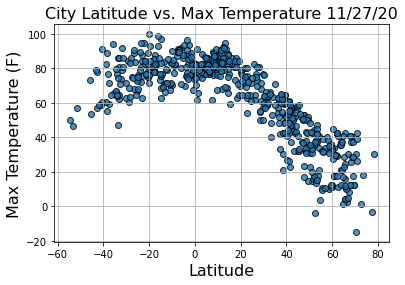

In [20]:
import time

today = time.strftime("%x")

plt.scatter(lats, max_temps, edgecolor = "black", linewidth = 1, marker = "o", alpha = 0.8, label = "Cities")
plt.title(f"City Latitude vs. Max Temperature "+ today, fontsize = 16)
plt.xlabel('Latitude', fontsize = 16)
plt.ylabel('Max Temperature (F)', fontsize = 16)
plt.grid(True)

plt.savefig("weather_data/Fig1.png")
plt.show()

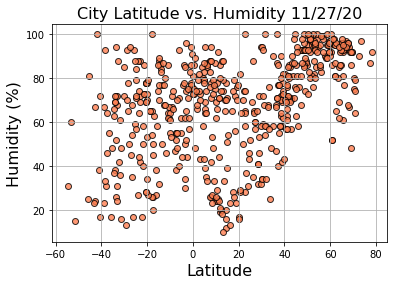

In [21]:
# Build the scatter plots for latitude vs. Humidity.
plt.scatter(lats, humidity, edgecolor = "black", linewidth = 1, marker = "o", alpha = 0.8, c = "coral", label = 'Cities')
plt.title(f"City Latitude vs. Humidity " + today, fontsize = 16)
plt.ylabel("Humidity (%)", fontsize = 16)
plt.xlabel("Latitude",fontsize = 16)
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

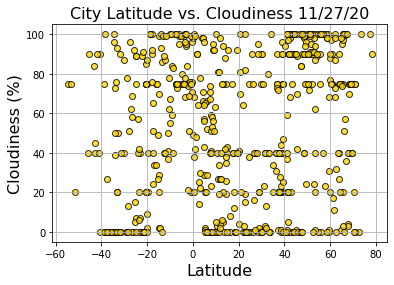

In [22]:
# Build the scatter plots for latitude vs. Cloudiness.

plt.scatter(lats, cloudiness, edgecolor = "black", linewidth = 1, marker = "o", alpha = 0.8, c = "gold", label = 'Cities')
plt.title(f"City Latitude vs. Cloudiness " + today, fontsize = 16)
plt.ylabel("Cloudiness (%)", fontsize = 16)
plt.xlabel("Latitude",fontsize = 16)
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

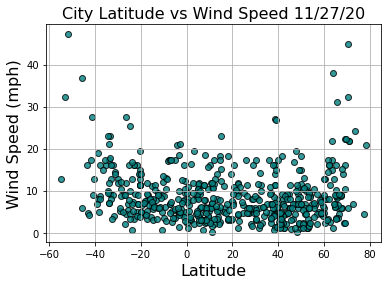

In [23]:
# Build the scatter plots for latitude vs. wind speed.

plt.scatter(lats, wind_speed, edgecolor = "black", linewidth = 1, marker = "o", alpha = 0.8, c = "teal", label = 'Cities')
plt.title(f"City Latitude vs Wind Speed " + today, fontsize = 16)
plt.ylabel("Wind Speed (mph)", fontsize = 16)
plt.xlabel("Latitude", fontsize = 16)
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [52]:
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    #Run regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #Calculate regression line
    regress_values = x_values * slope + intercept
    
    #Get line equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "g")
    
    #Annotate text equation
    plt.title(title)
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "green")
    plt.xlabel('Latitude', fontsize = 15)
    plt.ylabel(y_label, fontsize = 15)
    plt.show()


In [25]:
index13 = city_data_df.loc[13]
index13

City                     Coquimbo
Country                        CL
Date          2020-11-27 16:53:11
Lat                        -29.95
Lng                        -71.34
Max Temp                     62.6
Humidity                       72
Cloudiness                     40
Wind Speed                  12.75
Name: 13, dtype: object

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Kuminskiy,RU,2020-11-27 16:55:17,58.67,66.57,9.81,95,98,4.54
4,Sinnamary,GF,2020-11-27 16:55:17,5.38,-52.95,85.46,64,2,11.21
8,Qeshm,IR,2020-11-27 16:55:18,26.96,56.27,73.40,60,40,4.70
9,Beisfjord,NO,2020-11-27 16:55:18,68.38,17.60,37.40,93,75,13.87
10,Eyl,SO,2020-11-27 16:55:18,7.98,49.82,77.50,71,0,18.41


In [34]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

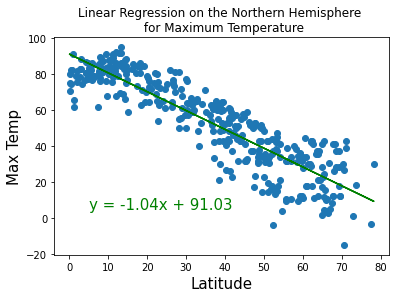

In [53]:
#Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(5,5))

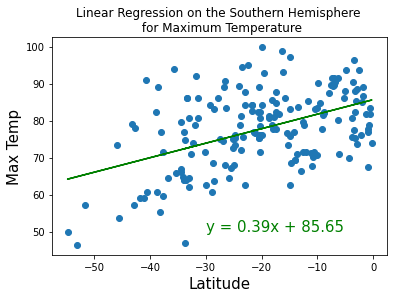

In [54]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-30,50))

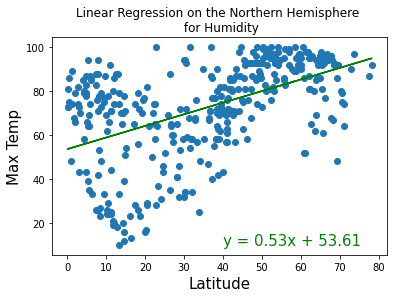

In [57]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

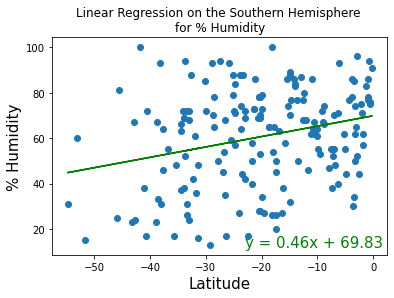

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-23,12))

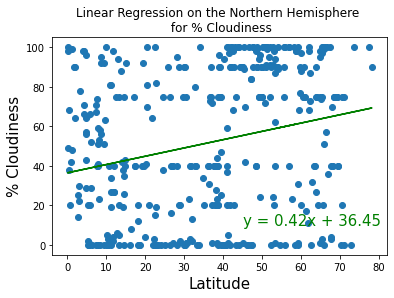

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(45,10))

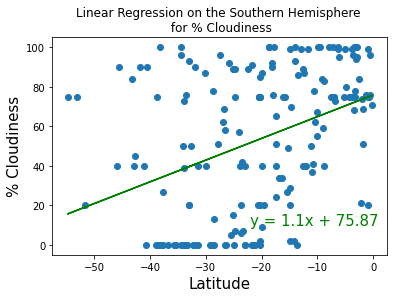

In [72]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-22,10))

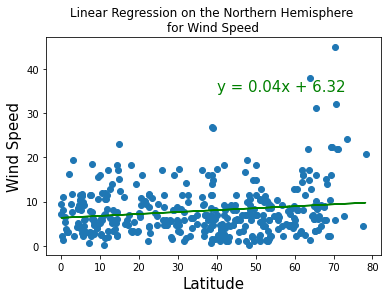

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))


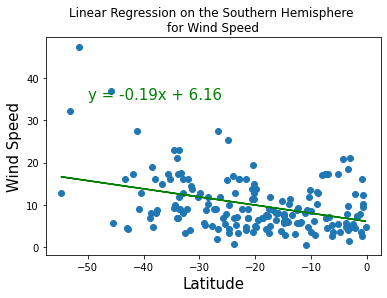

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))